计算方法实验题 2016
===========================
![assignment](images/assignment.png)

-----for all figures below, the blue curve is the figure of f(x)-----

---Question 1. lagrange interpolation for equally spaced nodes---


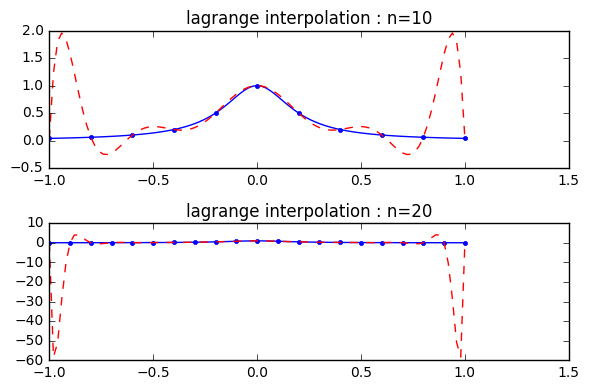


---Question 2. piecewise linear interpolation for equally spaced nodes---


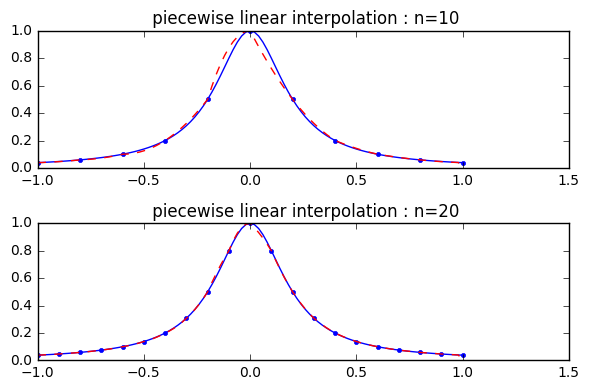


---Question 3. least square fitting when x_k=-1+2k/n ---


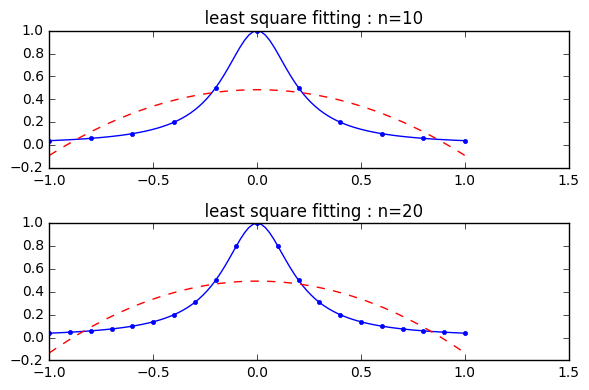


---Question 4. lagrange interpolation when x_k=cos((2k+1)/(2n+2))pi ---


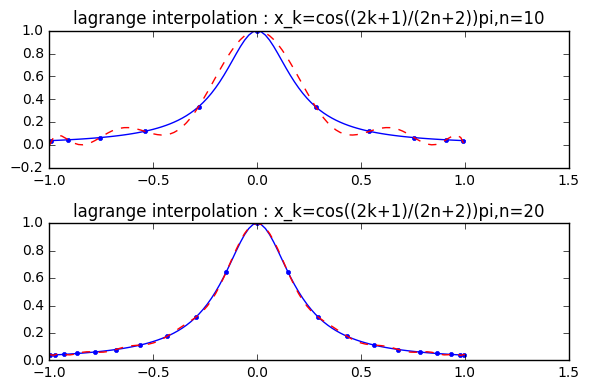

In [96]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

def f(x):
    return 1./(1+25*(x**2))

#--- Q1 Q4 lagrange interpolation 
def lagrange_interpolation(X,fX,x):
    n=len(X)
    L=0
    for k in range(n):
        l_k=1.0
        for i in range(n):
            if i!=k:
                l_k=l_k*(x-X[i])/(X[k]-X[i])
        L=L+fX[k]*l_k
    return L

#--- Q2 piecewise linear interpolation
def sub_interpolation(X,fX,x_v):
    result = np.zeros_like(x_v)   
    for ind,x in enumerate(x_v):
        for i in range(len(X)-2):
            if x >= X[i] and x <= X[i+2]:
                result[ind] = fX[i]*(x-X[i+1])*(x-X[i+2])/(X[i]-X[i+1])/(X[i]-X[i+2]) + \
                         fX[i+1]*(x-X[i])*(x-X[i+2])/(X[i+1]-X[i])/(X[i+1]-X[i+2]) + \
                         fX[i+2]*(x-X[i])*(x-X[i+1])/(X[i+2]-X[i])/(X[i+2]-X[i+1])
    return result

#--- Q3 least square fitting
def ls_fit(X,fX,x,n=4):
    # n=4 (1,x,x^2,x^3)
    # calculate Gram matrix and d
    G=np.zeros((n,n))
    d=np.ones((n,1))
    for i in range(n):
        d[i]=np.dot((X**i).T,fX)
        for j in range(i,n):
            G[i,j]=G[j,i]=np.dot((X**i).T,X**j)

    # Ga=d solve a
    a=np.linalg.solve(G,d)
    # S(x)=aphi(x)
    result=0
    for i in range(n):
        result+=a[i]*x**i
    return result            

# ---------------- x value --------------#
a,b=-1.0,1.0
# X for show func
n=100.0
X=np.arange(a,b+(b-a)/n,(b-a)/n)

# X samples
#in Q1 and Q2
X_10=np.arange(a,b+(b-a)/10.0,(b-a)/10.0)
X_20=np.arange(a,b+(b-a)/20.0,(b-a)/20.0)
# Q3 x_k=-1+2k/n 
X_lin_10=np.arange(10.0+1)*2/10.0-1
X_lin_20=np.arange(20.0+1)*2/20.0-1
# Q4 x_k=cos(2k+1/2n+2)pi 
X_cos_10=np.cos((2*np.arange(10.0+1)+1)/(2*10.0+2)*np.pi)
X_cos_20=np.cos((2*np.arange(20.0+1)+1)/(2*20.0+2)*np.pi)

# ----------------print answers----------------- #
print '-----for all figures below, the blue curve is the figure of f(x)-----'
# -------------- Q1
print '\n---Question 1. lagrange interpolation for equally spaced nodes---'

# n=10
plt.subplot(211)
plt.plot(X_10,f(X_10),'.')  # 
plt.plot(X,f(X),'-',color='b')  # show f
plt.plot(X_test,lagrange_interpolation(X_10,f(X_10),X_test),'--',color='r') # show lagrange
plt.title('lagrange interpolation : n=10')

plt.tight_layout()
# n=20
plt.subplot(212)
plt.plot(X_20,f(X_20),'.')  # 
plt.plot(X,f(X),'-',color='b')  # show f
plt.plot(X_test,lagrange_interpolation(X_20,f(X_20),X_test),'--',color='r') # show lagrange
plt.title('lagrange interpolation : n=20')

plt.tight_layout()
plt.show()

# -------------- Q2
print '\n---Question 2. piecewise linear interpolation for equally spaced nodes---'
# n=10
plt.figure()
plt.subplot(211)
plt.plot(X_10,f(X_10),'.')  # 
plt.plot(X,f(X),'-',color='b')  # show f
plt.plot(X_test,sub_interpolation(X_10,f(X_10),X_test),'--',color='r') # show piecewise
plt.title(' piecewise linear interpolation : n=10')

plt.tight_layout()
# n=20
plt.subplot(212)
plt.plot(X_20,f(X_20),'.')  # 
plt.plot(X,f(X),'-',color='b')  # show f
plt.plot(X_test,sub_interpolation(X_20,f(X_20),X_test),'--',color='r') # show piecewise
plt.title(' piecewise linear interpolation : n=20')
plt.tight_layout()
plt.show()

# -------------- Q3
print '\n---Question 3. least square fitting when x_k=-1+2k/n ---'
# n=10
plt.figure()
plt.subplot(211)
plt.plot(X_lin_10,f(X_lin_10),'.')  # 
plt.plot(X,f(X),'-',color='b')  # show f
plt.plot(X_test,ls_fit(X_lin_10,f(X_lin_10),X_test),'--',color='r') # show ls fit
plt.title('  least square fitting : n=10')

plt.tight_layout()
# n=20
plt.subplot(212)
plt.plot(X_lin_20,f(X_lin_20),'.')  # 
plt.plot(X,f(X),'-',color='b')  # show f
plt.plot(X_test,ls_fit(X_lin_20,f(X_lin_20),X_test),'--',color='r') # show ls fit
plt.title('  least square fitting : n=20')
plt.tight_layout()
plt.show()

# -------------- Q4
print '\n---Question 4. lagrange interpolation when x_k=cos((2k+1)/(2n+2))pi ---'

# n=10
plt.subplot(211)
plt.plot(X_cos_10,f(X_cos_10),'.')  # 
plt.plot(X,f(X),'-',color='b')  # show f
plt.plot(X_test,lagrange_interpolation(X_cos_10,f(X_cos_10),X_test),'--',color='r') # show lagrange
plt.title('lagrange interpolation : x_k=cos((2k+1)/(2n+2))pi,n=10')

plt.tight_layout()
# n=20
plt.subplot(212)
plt.plot(X_cos_20,f(X_cos_20),'.')  # 
plt.plot(X,f(X),'-',color='b')  # show f
plt.plot(X_test,lagrange_interpolation(X_cos_20,f(X_cos_20),X_test),'--',color='r') # show lagrange
plt.title('lagrange interpolation : x_k=cos((2k+1)/(2n+2))pi,n=20')

plt.tight_layout()
plt.show()

### Question 5.
比较3组近似函数：  
分别是lagrange插值，分段线性插值和最小二乘多项式拟合。  

lagrange在等距节点下，n次数较高时，很容易出现龙格现象，误差会很大。而取节点为$x_k=cos\frac{2k+1}{2(n+1)}\pi$时，龙格现象会减轻很多，误差减少。即lagrange插值和节点取值有关系。  

分段线性插值克服了龙格现象，并且取值点越多，效果越好。

最小二乘多项式在多项式次数较低时效果不好，而增加多项式次数后如下图，为多项式次数为8时的拟合结果，会好一些。

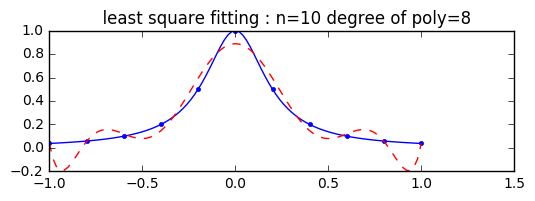

In [98]:
# n=10
plt.figure()
plt.subplot(211)
plt.plot(X_lin_10,f(X_lin_10),'.')  # 
plt.plot(X,f(X),'-',color='b')  # show f
plt.plot(X_test,ls_fit(X_lin_10,f(X_lin_10),X_test,9),'--',color='r') # show ls fit
plt.title('  least square fitting : n=10 degree of poly=8')